# Task 1: Use NLP techniques to analyze a collection of texts
In this task, you will use NLP techniques in Python to analyze texts comprising complaints regarding decisions 
made by the local municipality. The data are unstructured, not allowing for direct systematic analysis. In addition,
the number of complaints makes overlooking the most pressing issues an intricate task. Your goal is to extract 
these most frequently addressed topics from the written texts, providing decision-makers with this information.


## 1. Exploratory Data Analysis
As usual, let´s start with some basic exploratory analysis.

1.1 Loading Modules

In [1]:
#pip install --user ipykernel
#python -m ipykernel install --user --name=myenv
#https://towardsdatascience.com/creating-and-using-virtual-environment-on-jupyter-notebook-with-python-db3f5afdd56a
#https://towardsdatascience.com/generating-a-requirements-file-jupyter-notebook-385f1c315b52#:~:text=Simply%20open%20a%20terminal%20and,environment%20using%20venv%20or%20conda.&text=It%20will%20take%20every%20package%20you%20have%20installed%20on%20that%20environment.
import numpy as np
import pandas as pd
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb
import statistics

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

from warnings import filterwarnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from PIL import Image
import nltk
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('punkt')
from nltk.corpus import stopwords, wordnet
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob
from wordcloud import WordCloud

output_notebook()

%matplotlib inline

Loading BokehJS ...

1.2 Loading the raw dataset

In [2]:
datafile = '/kaggle/input/amazon-music-reviews/Musical_instruments_reviews.csv'
raw_data = pd.read_csv(datafile, parse_dates=[8])

1.3 Describe the raw dataset

In [3]:
print('There are {} rows and {} columns in test'.format(raw_data.shape[0],raw_data.shape[1]))

There are 10261 rows and 9 columns in test


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   reviewerID      10261 non-null  object        
 1   asin            10261 non-null  object        
 2   reviewerName    10234 non-null  object        
 3   helpful         10261 non-null  object        
 4   reviewText      10254 non-null  object        
 5   overall         10261 non-null  float64       
 6   summary         10261 non-null  object        
 7   unixReviewTime  10261 non-null  int64         
 8   reviewTime      10261 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 721.6+ KB


In [5]:
raw_data['overall'].describe()

count    10261.000000
mean         4.488744
std          0.894642
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: overall, dtype: float64

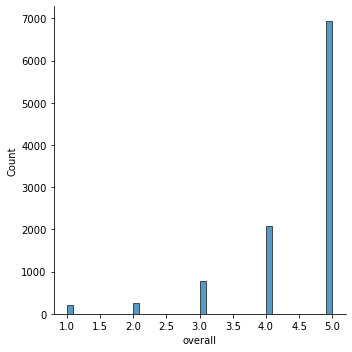

In [6]:
sns.displot(raw_data, x="overall")

1.4 Basic EDA

In [7]:
#Method 1: Remove Punctuation, more precise find word charakter and remove whitespace charakter
raw_data['reviewText'] = raw_data['reviewText'].str.replace('[^\w\s]', '')
raw_data.head(10)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",Not much to write about here but it does exact...,5.0,good,1393545600,2014-02-28
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,2013-03-16
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,2013-08-28
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,2014-02-14
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great It looks and performs...,5.0,No more pops when I record my vocals.,1392940800,2014-02-21
5,A2A039TZMZHH9Y,B00004Y2UT,"Bill Lewey ""blewey""","[0, 0]",So good that I bought another one Love the he...,5.0,The Best Cable,1356048000,2012-12-21
6,A1UPZM995ZAH90,B00004Y2UT,Brian,"[0, 0]",I have used monster cables for years and with ...,5.0,Monster Standard 100 - 21' Instrument Cable,1390089600,2014-01-19
7,AJNFQI3YR6XJ5,B00004Y2UT,"Fender Guy ""Rick""","[0, 0]",I now use this cable to run from the output of...,3.0,Didn't fit my 1996 Fender Strat...,1353024000,2012-11-16
8,A3M1PLEYNDEYO8,B00004Y2UT,"G. Thomas ""Tom""","[0, 0]",Perfect for my Epiphone Sheraton II Monster c...,5.0,Great cable,1215302400,2008-07-06
9,AMNTZU1YQN1TH,B00004Y2UT,Kurt Robair,"[0, 0]",Monster makes the best cables and a lifetime w...,5.0,Best Instrument Cables On The Market,1389139200,2014-01-08


In [8]:
#Method 1: Remove Digits (\w contains a-z, A-Z, 0-9)
raw_data['reviewText'] = raw_data['reviewText'].str.replace('\d', '')
raw_data.head(10)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",Not much to write about here but it does exact...,5.0,good,1393545600,2014-02-28
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,2013-03-16
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,2013-08-28
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,2014-02-14
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great It looks and performs...,5.0,No more pops when I record my vocals.,1392940800,2014-02-21
5,A2A039TZMZHH9Y,B00004Y2UT,"Bill Lewey ""blewey""","[0, 0]",So good that I bought another one Love the he...,5.0,The Best Cable,1356048000,2012-12-21
6,A1UPZM995ZAH90,B00004Y2UT,Brian,"[0, 0]",I have used monster cables for years and with ...,5.0,Monster Standard 100 - 21' Instrument Cable,1390089600,2014-01-19
7,AJNFQI3YR6XJ5,B00004Y2UT,"Fender Guy ""Rick""","[0, 0]",I now use this cable to run from the output of...,3.0,Didn't fit my 1996 Fender Strat...,1353024000,2012-11-16
8,A3M1PLEYNDEYO8,B00004Y2UT,"G. Thomas ""Tom""","[0, 0]",Perfect for my Epiphone Sheraton II Monster c...,5.0,Great cable,1215302400,2008-07-06
9,AMNTZU1YQN1TH,B00004Y2UT,Kurt Robair,"[0, 0]",Monster makes the best cables and a lifetime w...,5.0,Best Instrument Cables On The Market,1389139200,2014-01-08


In [9]:
#lower text
raw_data["reviewText"] = raw_data["reviewText"].str.lower()
raw_data.head(10)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",not much to write about here but it does exact...,5.0,good,1393545600,2014-02-28
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",the product does exactly as it should and is q...,5.0,Jake,1363392000,2013-03-16
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",the primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,2013-08-28
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",nice windscreen protects my mxl mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,2014-02-14
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",this pop filter is great it looks and performs...,5.0,No more pops when I record my vocals.,1392940800,2014-02-21
5,A2A039TZMZHH9Y,B00004Y2UT,"Bill Lewey ""blewey""","[0, 0]",so good that i bought another one love the he...,5.0,The Best Cable,1356048000,2012-12-21
6,A1UPZM995ZAH90,B00004Y2UT,Brian,"[0, 0]",i have used monster cables for years and with ...,5.0,Monster Standard 100 - 21' Instrument Cable,1390089600,2014-01-19
7,AJNFQI3YR6XJ5,B00004Y2UT,"Fender Guy ""Rick""","[0, 0]",i now use this cable to run from the output of...,3.0,Didn't fit my 1996 Fender Strat...,1353024000,2012-11-16
8,A3M1PLEYNDEYO8,B00004Y2UT,"G. Thomas ""Tom""","[0, 0]",perfect for my epiphone sheraton ii monster c...,5.0,Great cable,1215302400,2008-07-06
9,AMNTZU1YQN1TH,B00004Y2UT,Kurt Robair,"[0, 0]",monster makes the best cables and a lifetime w...,5.0,Best Instrument Cables On The Market,1389139200,2014-01-08


In [10]:
#remove stopwords
sw = stopwords.words('english')
raw_data['reviewText'] = raw_data['reviewText'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))
raw_data.head(10)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",much write exactly supposed filters pop sounds...,5.0,good,1393545600,2014-02-28
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",product exactly quite affordablei realized dou...,5.0,Jake,1363392000,2013-03-16
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",primary job device block breath would otherwis...,5.0,It Does The Job Well,1377648000,2013-08-28
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",nice windscreen protects mxl mic prevents pops...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,2014-02-14
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",pop filter great looks performs like studio fi...,5.0,No more pops when I record my vocals.,1392940800,2014-02-21
5,A2A039TZMZHH9Y,B00004Y2UT,"Bill Lewey ""blewey""","[0, 0]",good bought another one love heavy cord gold c...,5.0,The Best Cable,1356048000,2012-12-21
6,A1UPZM995ZAH90,B00004Y2UT,Brian,"[0, 0]",used monster cables years good reason lifetime...,5.0,Monster Standard 100 - 21' Instrument Cable,1390089600,2014-01-19
7,AJNFQI3YR6XJ5,B00004Y2UT,"Fender Guy ""Rick""","[0, 0]",use cable run output pedal chain input fender ...,3.0,Didn't fit my 1996 Fender Strat...,1353024000,2012-11-16
8,A3M1PLEYNDEYO8,B00004Y2UT,"G. Thomas ""Tom""","[0, 0]",perfect epiphone sheraton ii monster cables we...,5.0,Great cable,1215302400,2008-07-06
9,AMNTZU1YQN1TH,B00004Y2UT,Kurt Robair,"[0, 0]",monster makes best cables lifetime warranty do...,5.0,Best Instrument Cables On The Market,1389139200,2014-01-08


In [11]:
#lemmatize
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

raw_data['reviewText'] = raw_data['reviewText'].apply(lambda text: lemmatize_words(text))
raw_data.head(10)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",much write exactly suppose filter pop sound re...,5.0,good,1393545600,2014-02-28
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",product exactly quite affordablei realize doub...,5.0,Jake,1363392000,2013-03-16
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",primary job device block breath would otherwis...,5.0,It Does The Job Well,1377648000,2013-08-28
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",nice windscreen protects mxl mic prevents pops...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,2014-02-14
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",pop filter great look performs like studio fil...,5.0,No more pops when I record my vocals.,1392940800,2014-02-21
5,A2A039TZMZHH9Y,B00004Y2UT,"Bill Lewey ""blewey""","[0, 0]",good buy another one love heavy cord gold conn...,5.0,The Best Cable,1356048000,2012-12-21
6,A1UPZM995ZAH90,B00004Y2UT,Brian,"[0, 0]",use monster cable year good reason lifetime wa...,5.0,Monster Standard 100 - 21' Instrument Cable,1390089600,2014-01-19
7,AJNFQI3YR6XJ5,B00004Y2UT,"Fender Guy ""Rick""","[0, 0]",use cable run output pedal chain input fender ...,3.0,Didn't fit my 1996 Fender Strat...,1353024000,2012-11-16
8,A3M1PLEYNDEYO8,B00004Y2UT,"G. Thomas ""Tom""","[0, 0]",perfect epiphone sheraton ii monster cable wel...,5.0,Great cable,1215302400,2008-07-06
9,AMNTZU1YQN1TH,B00004Y2UT,Kurt Robair,"[0, 0]",monster make best cable lifetime warranty does...,5.0,Best Instrument Cables On The Market,1389139200,2014-01-08


In [12]:
reindexed_data = raw_data['reviewText']
reindexed_data.head(20)

0     much write exactly suppose filter pop sound re...
1     product exactly quite affordablei realize doub...
2     primary job device block breath would otherwis...
3     nice windscreen protects mxl mic prevents pops...
4     pop filter great look performs like studio fil...
5     good buy another one love heavy cord gold conn...
6     use monster cable year good reason lifetime wa...
7     use cable run output pedal chain input fender ...
8     perfect epiphone sheraton ii monster cable wel...
9     monster make best cable lifetime warranty does...
10    monster make wide array cable include high end...
11    got need find dont really need often rarely us...
12    use use large sustain pedal play piano may app...
13    love use yamaha ypt work great would recommend...
14       buy use home studio control midi keyboard want
15    buy use keyboard wasnt really aware option key...
16    fender cable perfect length sometimes find bit...
17    want look aloneit nice look cord know perf

1.5 splitting the dataset for testing different methods. "reindexed_data" is the raw text, while "data_01" is filtered the noun phrases with the TextBlob module.

In [13]:
data_01 = [TextBlob(str(reindexed_data[i])).noun_phrases for i in range(reindexed_data.shape[0])]

In [14]:
data_01 = pd.Series(data_01).str[0]

1.5.1 drop empty rows

In [15]:
data_01 = data_01.dropna()

1.6 Define helper functions

In [16]:
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized = count_vectorizer.fit_transform(text_data.values.astype('U'))
    vectorized_total = np.sum(vectorized, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

1.7 show most counted words or topics

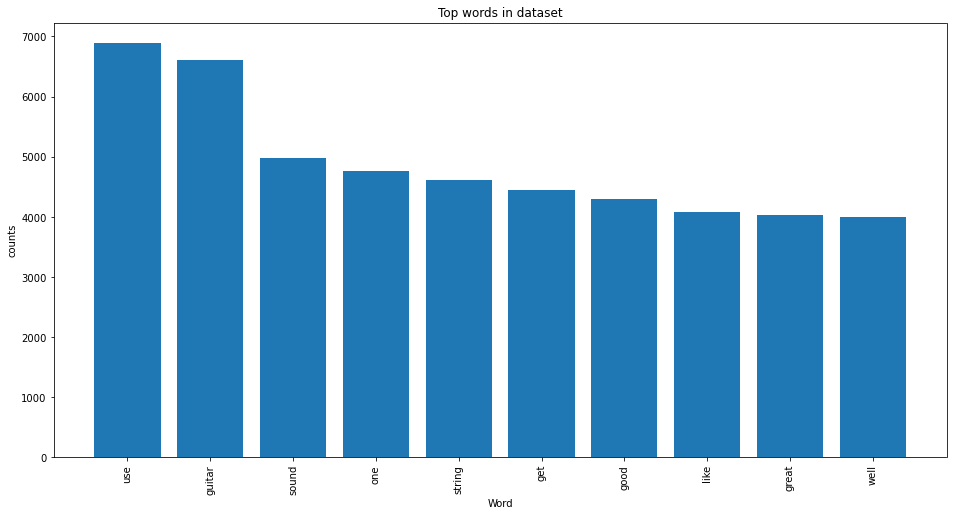

In [17]:
count_vectorizer = CountVectorizer()
words, word_values = get_top_n_words(n_top_words=10,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=reindexed_data)

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top words in dataset');
ax.set_xlabel('Word');
ax.set_ylabel('counts');
plt.show()

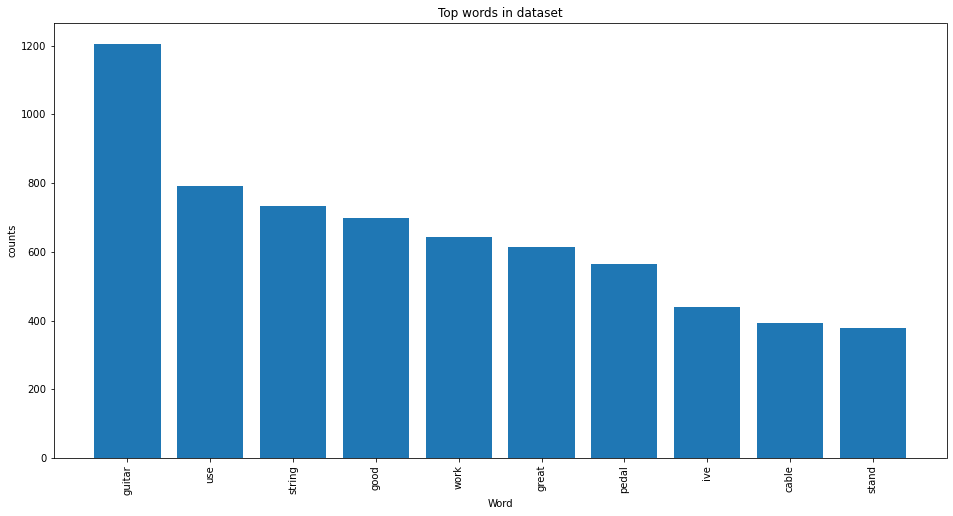

In [18]:
count_vectorizer = CountVectorizer()
words, word_values = get_top_n_words(n_top_words=10,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=data_01)

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top words in dataset');
ax.set_xlabel('Word');
ax.set_ylabel('counts');
plt.show()

## 2.1 Modelling
After the first analysis and EDA we can start the modelling process.

2.1 preprocessing

For the selection of the max_features number in the CountVectorizer function i choose the mean value.

In [19]:
count_vectorizer = CountVectorizer()
words, word_values = get_top_n_words(n_top_words=4500,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=data_01)
statistics.mean(word_values)
max_feature_words = sum(i >= statistics.mean(word_values) for i in word_values)

In [20]:
count_vectorizer = CountVectorizer(max_features=max_feature_words)
text_sample = data_01.sample(n=len(data_01), random_state=0).values
term_matrix = count_vectorizer.fit_transform(text_sample.astype(str))

In [21]:
n_topics = 10

### 2.2 Latent Semantic Analysis

2.2.1 preprocessing

In [22]:
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(term_matrix)

In [23]:
# Define helper functions
def get_keys(topic_matrix):
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [24]:
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [25]:
# Define helper functions
def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

2.2.2 show top n (in this case:10) wordpairs

In [26]:
top_n_words_lsa = get_top_n_words(2, lsa_keys, term_matrix, count_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  guitar strap
Topic 2:  use ive
Topic 3:  good price
Topic 4:  string daddario
Topic 5:  pedal great
Topic 6:  pedal behringer
Topic 7:  work capo
Topic 8:  cable quality
Topic 9:  stand mic
Topic 10:  ive tuner


2.2.3 show the distribution of the top n word-pairs

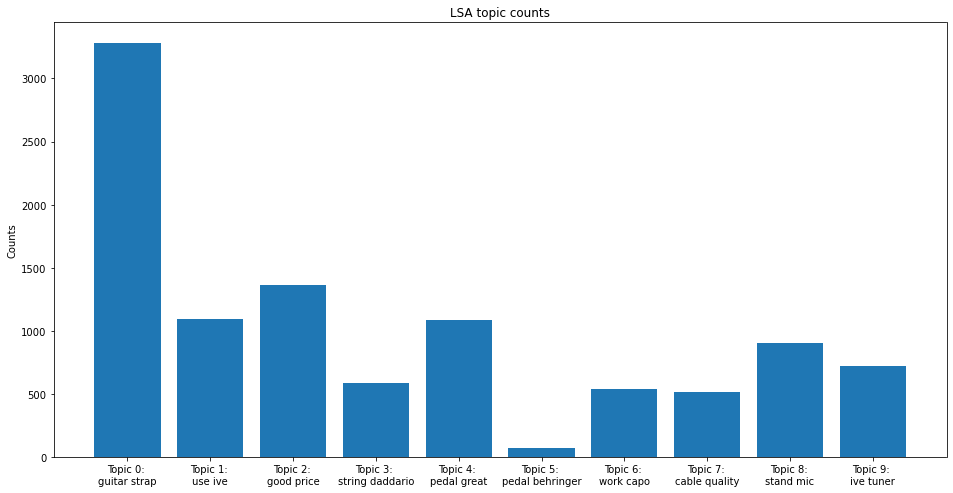

In [27]:
top_n_words = get_top_n_words(2, lsa_keys, term_matrix, count_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_n_words[i] for i in lsa_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Counts');
ax.set_title('LSA topic counts');
plt.show()

2.2.4 To visualize the clustering process i use the t-SNE technique

In [28]:
tsne_lsa_model = TSNE(n_components=2, perplexity=30, learning_rate="auto", 
                        n_iter=1000, verbose=0, random_state=0, angle=0.5)
tsne_lsa_vectors = tsne_lsa_model.fit_transform(lsa_topic_matrix)

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [29]:
# Define helper functions
def get_mean_topic_vectors(keys, two_dim_vectors):
    mean_topic_vectors = []
    for t in range(n_topics):
        words_in_topic = []
        for i in range(len(keys)):
            if keys[i] == t:
                words_in_topic.append(two_dim_vectors[i])    
        
        words_in_topic = np.vstack(words_in_topic)
        mean_word_in_topic = np.mean(words_in_topic, axis=0)
        mean_topic_vectors.append(mean_word_in_topic)
    return mean_topic_vectors

In [30]:
# Define colormap
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap = colormap[:n_topics]

In [31]:
top_words_lsa = get_top_n_words(2, lsa_keys, term_matrix, count_vectorizer)
lsa_mean_topic_vectors = get_mean_topic_vectors(lsa_keys, tsne_lsa_vectors)

plot = figure(title="t-SNE Clustering of {} LSA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lsa_vectors[:,0], y=tsne_lsa_vectors[:,1], color=colormap[lsa_keys])

for t in range(n_topics):
    label = Label(x=lsa_mean_topic_vectors[t][0], y=lsa_mean_topic_vectors[t][1], 
                  text=top_words_lsa[t], text_color=colormap[t])
    plot.add_layout(label)
    
show(plot)

### 2.3 Latent Dirichilet Allocation
Now im repeating the procedure but with the LDA Method.

In [32]:
lda_model = LatentDirichletAllocation(n_components=n_topics, learning_method='online', 
                                          random_state=0, verbose=0)
lda_topic_matrix = lda_model.fit_transform(term_matrix)

In [33]:
lda_keys = get_keys(lda_topic_matrix)
lda_categories, lda_counts = keys_to_counts(lda_keys)

In [34]:
top_n_words_lda = get_top_n_words(2, lda_keys, term_matrix, count_vectorizer)

for i in range(len(top_n_words_lda)):
    print("Topic {}: ".format(i+1), top_n_words_lda[i])

Topic 1:  nice im
Topic 2:  string purchase
Topic 3:  cable tuner
Topic 4:  good sound
Topic 5:  work ive
Topic 6:  guitar strap
Topic 7:  pedal tone
Topic 8:  price dont
Topic 9:  stand mic
Topic 10:  need review


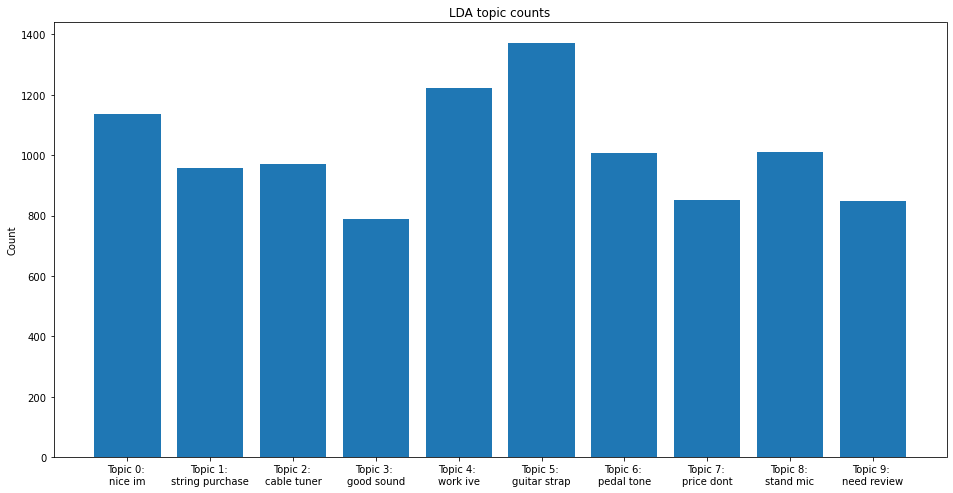

In [35]:
top_n_words = get_top_n_words(2, lda_keys, term_matrix, count_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_n_words[i] for i in lda_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lda_categories, lda_counts);
ax.set_xticks(lda_categories);
ax.set_xticklabels(labels);
ax.set_title('LDA topic counts');
ax.set_ylabel('Count');

In [36]:
tsne_lda_model = TSNE(n_components=2, perplexity=30, learning_rate="auto", 
                        n_iter=1000, verbose=0, random_state=0, angle=0.5)
tsne_lda_vectors = tsne_lda_model.fit_transform(lda_topic_matrix)

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [37]:
top_n_words_lda = get_top_n_words(2, lda_keys, term_matrix, count_vectorizer)
lda_mean_topic_vectors = get_mean_topic_vectors(lda_keys, tsne_lda_vectors)

plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lda_vectors[:,0], y=tsne_lda_vectors[:,1], color=colormap[lda_keys])

for t in range(n_topics):
    label = Label(x=lda_mean_topic_vectors[t][0], y=lda_mean_topic_vectors[t][1], 
                  text=top_n_words_lda[t], text_color=colormap[t])
    plot.add_layout(label)

show(plot)

**Briefly discuss your result**
In the first stage of the EDA you can see a heavy bias. Around 90% of the comments have 5 Star rating, so one can expect more positive reviews.
Lets take a look at the two vectorizing methods. Vectorizing the whole dataset comes with some unwanted conditions, vectorizing the noun phrases makes in this context more sense. Lets move to the modelling with LSA Process. If we look at the Top n Words in a Bar-Chart one can see a bit unbalanced dataset. if we look at the t-sne we can see a somehow clustered dataset. To compare it with the LDA process, the distribution of the dataset is more balanced, but the t-sne doesnt look good. Regarding this i would choose the LSA Model. There are many many degrees of freedom when modelling this dataset, i think with more comparisson it would be possible to get a better solution. 
